In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load CSV´s
DShippo = pd.read_csv("datasets/train_radiomics_hipocamp.csv")
test_DShippo = pd.read_csv("datasets/test_radiomics_hipocamp.csv")

**Data Understanding**

In [3]:
# First rows
DShippo.head()

,ID,Image,Mask,diagnostics_Versions_PyRadiomics,diagnostics_Versions_Numpy,diagnostics_Versions_SimpleITK,diagnostics_Versions_PyWavelet,diagnostics_Versions_Python,diagnostics_Configuration_Settings,diagnostics_Configuration_EnabledImageTypes,...,lbp-3D-k_glszm_ZonePercentage,lbp-3D-k_glszm_ZoneVariance,lbp-3D-k_ngtdm_Busyness,lbp-3D-k_ngtdm_Coarseness,lbp-3D-k_ngtdm_Complexity,lbp-3D-k_ngtdm_Contrast,lbp-3D-k_ngtdm_Strength,Sex,Age,Transition
0,006_S_0681,/notebooks/disk2/DS2_FreeSurfer/ADNI_006_S_068...,/notebooks/disk2/DS2_FreeSurfer/ADNI_006_S_068...,2.2.0,1.18.5,1.2.4,1.1.1,3.7.7,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {}, 'LoG': {'sigma...",...,0.007881,345733.167092,479.414935,0.001538,0.183049,0.017044,0.001581,0,77.1,CN-CN
1,941_S_1203,/notebooks/disk2/DS2_FreeSurfer/ADNI_941_S_120...,/notebooks/disk2/DS2_FreeSurfer/ADNI_941_S_120...,2.2.0,1.18.5,1.2.4,1.1.1,3.7.7,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {}, 'LoG': {'sigma...",...,0.013112,244310.331892,378.001763,0.001761,0.146021,0.010782,0.001813,1,83.4,CN-CN
2,011_S_0003,/notebooks/disk2/DS2_FreeSurfer/ADNI_011_S_000...,/notebooks/disk2/DS2_FreeSurfer/ADNI_011_S_000...,2.2.0,1.18.5,1.2.4,1.1.1,3.7.7,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {}, 'LoG': {'sigma...",...,0.011331,222776.529605,497.261162,0.001567,0.190309,0.019644,0.001596,1,81.3,AD-AD
3,057_S_0779,/notebooks/disk2/DS2_FreeSurfer/ADNI_057_S_077...,/notebooks/disk2/DS2_FreeSurfer/ADNI_057_S_077...,2.2.0,1.18.5,1.2.4,1.1.1,3.7.7,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {}, 'LoG': {'sigma...",...,0.012197,280222.663268,406.837667,0.001629,0.148247,0.010824,0.001677,1,79.6,CN-MCI
4,033_S_0920,/notebooks/disk2/DS2_FreeSurfer/ADNI_033_S_092...,/notebooks/disk2/DS2_FreeSurfer/ADNI_033_S_092...,2.2.0,1.18.5,1.2.4,1.1.1,3.7.7,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {}, 'LoG': {'sigma...",...,0.010859,216779.591479,368.838125,0.001912,0.174701,0.014793,0.001979,0,80.1,CN-CN


Aqui vemos as primeiras 5 linhas do dataset.

Agora, para termos informações sobre o número de colunas, o tipo de dados e o uso de memória fazemos o seguinte:

In [4]:
# Dataset info
DShippo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Columns: 2181 entries, ID to Transition
dtypes: float64(2014), int64(147), object(20)
memory usage: 5.1+ MB


De seguida vêmos as estatísticas:

In [5]:
# Descrição das colunas
DShippo.describe()

,diagnostics_Image-original_Dimensionality,diagnostics_Image-original_Mean,diagnostics_Image-original_Minimum,diagnostics_Image-original_Maximum,diagnostics_Mask-original_VoxelNum,diagnostics_Mask-original_VolumeNum,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,...,lbp-3D-k_glszm_ZoneEntropy,lbp-3D-k_glszm_ZonePercentage,lbp-3D-k_glszm_ZoneVariance,lbp-3D-k_ngtdm_Busyness,lbp-3D-k_ngtdm_Coarseness,lbp-3D-k_ngtdm_Complexity,lbp-3D-k_ngtdm_Contrast,lbp-3D-k_ngtdm_Strength,Sex,Age
count,305.0,305.000000,305.0,305.000000,305.000000,305.0,305.000000,305.000000,305.000000,305.000000,...,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000
mean,3.0,5.810469,0.0,173.504918,6714.790164,2.0,0.411819,0.096916,10.137707,104.883349,...,2.681657,0.010477,266015.006289,362.064990,0.002024,0.155767,0.012415,0.002091,0.567213,75.171148
std,0.0,0.613858,0.0,24.108871,1066.815670,0.0,0.028993,0.009739,0.911329,6.180335,...,0.259507,0.002009,59267.210682,102.133366,0.000531,0.024285,0.003814,0.000552,0.496276,6.675866
min,3.0,4.321602,0.0,128.000000,3609.000000,2.0,0.330890,0.075142,8.420713,90.675836,...,1.984788,0.005818,138177.996378,130.618182,0.001137,0.071124,0.002565,0.001168,0.000000,55.300000
25%,3.0,5.317298,0.0,157.000000,5941.000000,2.0,0.392944,0.089977,9.525253,100.501871,...,2.507947,0.009060,225781.559367,285.617369,0.001632,0.140791,0.009751,0.001688,0.000000,71.300000
50%,3.0,5.811449,0.0,172.000000,6723.000000,2.0,0.412479,0.096609,10.106838,104.370667,...,2.688709,0.010580,259226.493061,353.841144,0.001934,0.156580,0.012297,0.001995,1.000000,75.000000
75%,3.0,6.237751,0.0,190.000000,7396.000000,2.0,0.431621,0.102240,10.635093,108.677326,...,2.844025,0.011706,298836.166667,431.288497,0.002305,0.173700,0.015166,0.002373,1.000000,79.900000
max,3.0,7.583210,0.0,255.000000,9453.000000,2.0,0.491496,0.144082,14.370911,126.209296,...,3.494062,0.017015,465865.829238,670.406531,0.004325,0.223273,0.024548,0.004417,1.000000,91.000000


**Missing Values**


In [6]:
# Valores nulos por coluna
DShippo.isnull().sum()

ID                                  0
Image                               0
Mask                                0
diagnostics_Versions_PyRadiomics    0
diagnostics_Versions_Numpy          0
                                   ..
lbp-3D-k_ngtdm_Contrast             0
lbp-3D-k_ngtdm_Strength             0
Sex                                 0
Age                                 0
Transition                          0
Length: 2181, dtype: int64

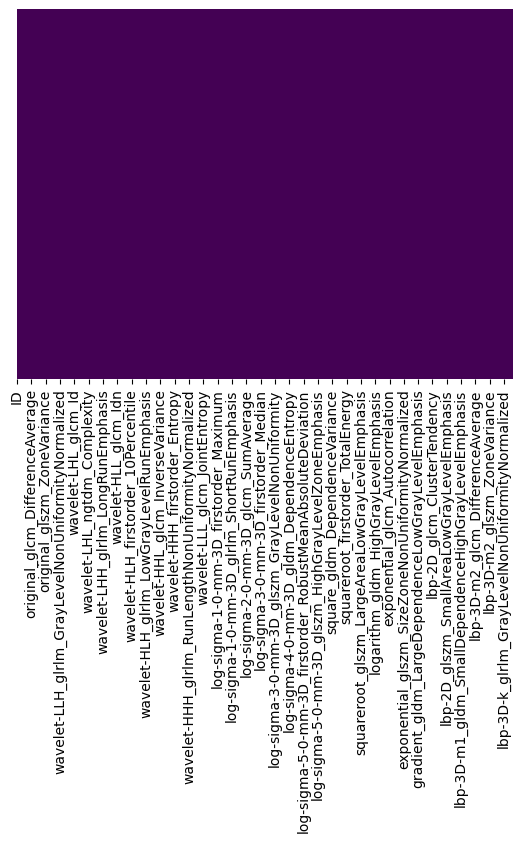

In [7]:
# Gráfico dos valores nulos 
sns.heatmap(DShippo.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

Confirmamos assim que não existem valores nulos.

**Valores Duplicados**

In [8]:
# Identificar linhas duplicadas
duplicados = DShippo.duplicated()
print(f"Linhas duplicadas: {duplicados.sum()}")  # Conta duplicados

# Exibir as linhas duplicadas (se houver)
if duplicados.sum() > 0:
    print("Duplicados:")
    print(DShippo[duplicados])
    # Remover duplicados
    DShippo.drop_duplicates(inplace=True)
    print(f"Linhas após remover duplicados: {DShippo.shape[0]}")

Linhas duplicadas: 0


Como verificamos no código acima, não existem linhas duplicadas.

**Data Preparation**

Identificamos as colunas que tem sempre o mesmo valor:

In [9]:
# Identificar as colunas que possuem sempre o mesmo valor
columns_nunique_1 = DShippo.columns[DShippo.nunique() == 1]

display(DShippo[columns_nunique_1].head())

,diagnostics_Versions_PyRadiomics,diagnostics_Versions_Numpy,diagnostics_Versions_SimpleITK,diagnostics_Versions_PyWavelet,diagnostics_Versions_Python,diagnostics_Configuration_Settings,diagnostics_Configuration_EnabledImageTypes,diagnostics_Image-original_Dimensionality,diagnostics_Image-original_Spacing,diagnostics_Image-original_Size,...,lbp-3D-m2_glszm_HighGrayLevelZoneEmphasis,lbp-3D-m2_glszm_LowGrayLevelZoneEmphasis,lbp-3D-m2_glszm_SizeZoneNonUniformity,lbp-3D-m2_glszm_SizeZoneNonUniformityNormalized,lbp-3D-m2_glszm_ZoneEntropy,lbp-3D-m2_ngtdm_Busyness,lbp-3D-m2_ngtdm_Coarseness,lbp-3D-m2_ngtdm_Complexity,lbp-3D-m2_ngtdm_Contrast,lbp-3D-m2_ngtdm_Strength
0,2.2.0,1.18.5,1.2.4,1.1.1,3.7.7,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {}, 'LoG': {'sigma...",3,"(1.0, 1.0, 1.0)","(256, 256, 256)",...,1,1,1,0.5,1.0,0,1000000,0,0,0
1,2.2.0,1.18.5,1.2.4,1.1.1,3.7.7,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {}, 'LoG': {'sigma...",3,"(1.0, 1.0, 1.0)","(256, 256, 256)",...,1,1,1,0.5,1.0,0,1000000,0,0,0
2,2.2.0,1.18.5,1.2.4,1.1.1,3.7.7,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {}, 'LoG': {'sigma...",3,"(1.0, 1.0, 1.0)","(256, 256, 256)",...,1,1,1,0.5,1.0,0,1000000,0,0,0
3,2.2.0,1.18.5,1.2.4,1.1.1,3.7.7,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {}, 'LoG': {'sigma...",3,"(1.0, 1.0, 1.0)","(256, 256, 256)",...,1,1,1,0.5,1.0,0,1000000,0,0,0
4,2.2.0,1.18.5,1.2.4,1.1.1,3.7.7,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {}, 'LoG': {'sigma...",3,"(1.0, 1.0, 1.0)","(256, 256, 256)",...,1,1,1,0.5,1.0,0,1000000,0,0,0


Como estas colunas não são uteis para avaliar os dados, decidimos descartá-las:

In [10]:
#Remover as colunas que possuem o mesmo valor
DShippo=DShippo.drop(columns=columns_nunique_1)

display(DShippo.head())

,ID,Image,Mask,diagnostics_Image-original_Hash,diagnostics_Image-original_Mean,diagnostics_Image-original_Maximum,diagnostics_Mask-original_Hash,diagnostics_Mask-original_BoundingBox,diagnostics_Mask-original_VoxelNum,diagnostics_Mask-original_CenterOfMassIndex,...,lbp-3D-k_glszm_ZonePercentage,lbp-3D-k_glszm_ZoneVariance,lbp-3D-k_ngtdm_Busyness,lbp-3D-k_ngtdm_Coarseness,lbp-3D-k_ngtdm_Complexity,lbp-3D-k_ngtdm_Contrast,lbp-3D-k_ngtdm_Strength,Sex,Age,Transition
0,006_S_0681,/notebooks/disk2/DS2_FreeSurfer/ADNI_006_S_068...,/notebooks/disk2/DS2_FreeSurfer/ADNI_006_S_068...,b5d774a32163a7ee822d42a07808a787f8687f56,5.848123,178,315bdd7a06bb73df17bfc1297398b4398e36e180,"(103, 113, 93, 36, 30, 71)",7106,"(121.94230227976358, 129.27272727272728, 128.4...",...,0.007881,345733.167092,479.414935,0.001538,0.183049,0.017044,0.001581,0,77.1,CN-CN
1,941_S_1203,/notebooks/disk2/DS2_FreeSurfer/ADNI_941_S_120...,/notebooks/disk2/DS2_FreeSurfer/ADNI_941_S_120...,397042d736bd790b7880b372b1749ff424f89cbe,5.238834,190,208a2b034b72592489315104ef526ca10d434f24,"(81, 127, 93, 47, 16, 73)",7779,"(107.06170458927883, 135.28088443244633, 128.2...",...,0.013112,244310.331892,378.001763,0.001761,0.146021,0.010782,0.001813,1,83.4,CN-CN
2,011_S_0003,/notebooks/disk2/DS2_FreeSurfer/ADNI_011_S_000...,/notebooks/disk2/DS2_FreeSurfer/ADNI_011_S_000...,84d679a88812c4aaf03a6d99f00c913b2f64506f,6.816667,155,352220437f6381b051fd4173969519887b530df6,"(77, 119, 89, 49, 30, 81)",6707,"(103.3640972118682, 135.28164604144922, 128.98...",...,0.011331,222776.529605,497.261162,0.001567,0.190309,0.019644,0.001596,1,81.3,AD-AD
3,057_S_0779,/notebooks/disk2/DS2_FreeSurfer/ADNI_057_S_077...,/notebooks/disk2/DS2_FreeSurfer/ADNI_057_S_077...,168f330d2ca3f097146e5d041f33b40672d230df,6.445162,171,9f62584e8badeb5de90b797d0c86c5170465d90f,"(93, 102, 90, 41, 29, 78)",8281,"(116.29827315541601, 118.67431469629271, 129.3...",...,0.012197,280222.663268,406.837667,0.001629,0.148247,0.010824,0.001677,1,79.6,CN-MCI
4,033_S_0920,/notebooks/disk2/DS2_FreeSurfer/ADNI_033_S_092...,/notebooks/disk2/DS2_FreeSurfer/ADNI_033_S_092...,ea5f291ea107dfda5e5c725eae7c0555ced44ce4,5.568269,150,62ab23b0a4ea4c9e7574b1ea410bd90236fe1d6e,"(87, 119, 91, 40, 27, 75)",5986,"(108.26561977948546, 132.05462746408287, 127.6...",...,0.010859,216779.591479,368.838125,0.001912,0.174701,0.014793,0.001979,0,80.1,CN-CN


Verificamos também que a coluna ID não está num formato adequado.
Adaptamos então a coluna de modo a que esteja numerada de 1 a 305, que é o numero de linhas do dataset.

In [11]:
# Mudar o id para numeros de 0 a 304
DShippo['ID'] = pd.factorize(DShippo['ID'])[0] + 1

display(DShippo.head())

,ID,Image,Mask,diagnostics_Image-original_Hash,diagnostics_Image-original_Mean,diagnostics_Image-original_Maximum,diagnostics_Mask-original_Hash,diagnostics_Mask-original_BoundingBox,diagnostics_Mask-original_VoxelNum,diagnostics_Mask-original_CenterOfMassIndex,...,lbp-3D-k_glszm_ZonePercentage,lbp-3D-k_glszm_ZoneVariance,lbp-3D-k_ngtdm_Busyness,lbp-3D-k_ngtdm_Coarseness,lbp-3D-k_ngtdm_Complexity,lbp-3D-k_ngtdm_Contrast,lbp-3D-k_ngtdm_Strength,Sex,Age,Transition
0,1,/notebooks/disk2/DS2_FreeSurfer/ADNI_006_S_068...,/notebooks/disk2/DS2_FreeSurfer/ADNI_006_S_068...,b5d774a32163a7ee822d42a07808a787f8687f56,5.848123,178,315bdd7a06bb73df17bfc1297398b4398e36e180,"(103, 113, 93, 36, 30, 71)",7106,"(121.94230227976358, 129.27272727272728, 128.4...",...,0.007881,345733.167092,479.414935,0.001538,0.183049,0.017044,0.001581,0,77.1,CN-CN
1,2,/notebooks/disk2/DS2_FreeSurfer/ADNI_941_S_120...,/notebooks/disk2/DS2_FreeSurfer/ADNI_941_S_120...,397042d736bd790b7880b372b1749ff424f89cbe,5.238834,190,208a2b034b72592489315104ef526ca10d434f24,"(81, 127, 93, 47, 16, 73)",7779,"(107.06170458927883, 135.28088443244633, 128.2...",...,0.013112,244310.331892,378.001763,0.001761,0.146021,0.010782,0.001813,1,83.4,CN-CN
2,3,/notebooks/disk2/DS2_FreeSurfer/ADNI_011_S_000...,/notebooks/disk2/DS2_FreeSurfer/ADNI_011_S_000...,84d679a88812c4aaf03a6d99f00c913b2f64506f,6.816667,155,352220437f6381b051fd4173969519887b530df6,"(77, 119, 89, 49, 30, 81)",6707,"(103.3640972118682, 135.28164604144922, 128.98...",...,0.011331,222776.529605,497.261162,0.001567,0.190309,0.019644,0.001596,1,81.3,AD-AD
3,4,/notebooks/disk2/DS2_FreeSurfer/ADNI_057_S_077...,/notebooks/disk2/DS2_FreeSurfer/ADNI_057_S_077...,168f330d2ca3f097146e5d041f33b40672d230df,6.445162,171,9f62584e8badeb5de90b797d0c86c5170465d90f,"(93, 102, 90, 41, 29, 78)",8281,"(116.29827315541601, 118.67431469629271, 129.3...",...,0.012197,280222.663268,406.837667,0.001629,0.148247,0.010824,0.001677,1,79.6,CN-MCI
4,5,/notebooks/disk2/DS2_FreeSurfer/ADNI_033_S_092...,/notebooks/disk2/DS2_FreeSurfer/ADNI_033_S_092...,ea5f291ea107dfda5e5c725eae7c0555ced44ce4,5.568269,150,62ab23b0a4ea4c9e7574b1ea410bd90236fe1d6e,"(87, 119, 91, 40, 27, 75)",5986,"(108.26561977948546, 132.05462746408287, 127.6...",...,0.010859,216779.591479,368.838125,0.001912,0.174701,0.014793,0.001979,0,80.1,CN-CN


**Data Analysis**

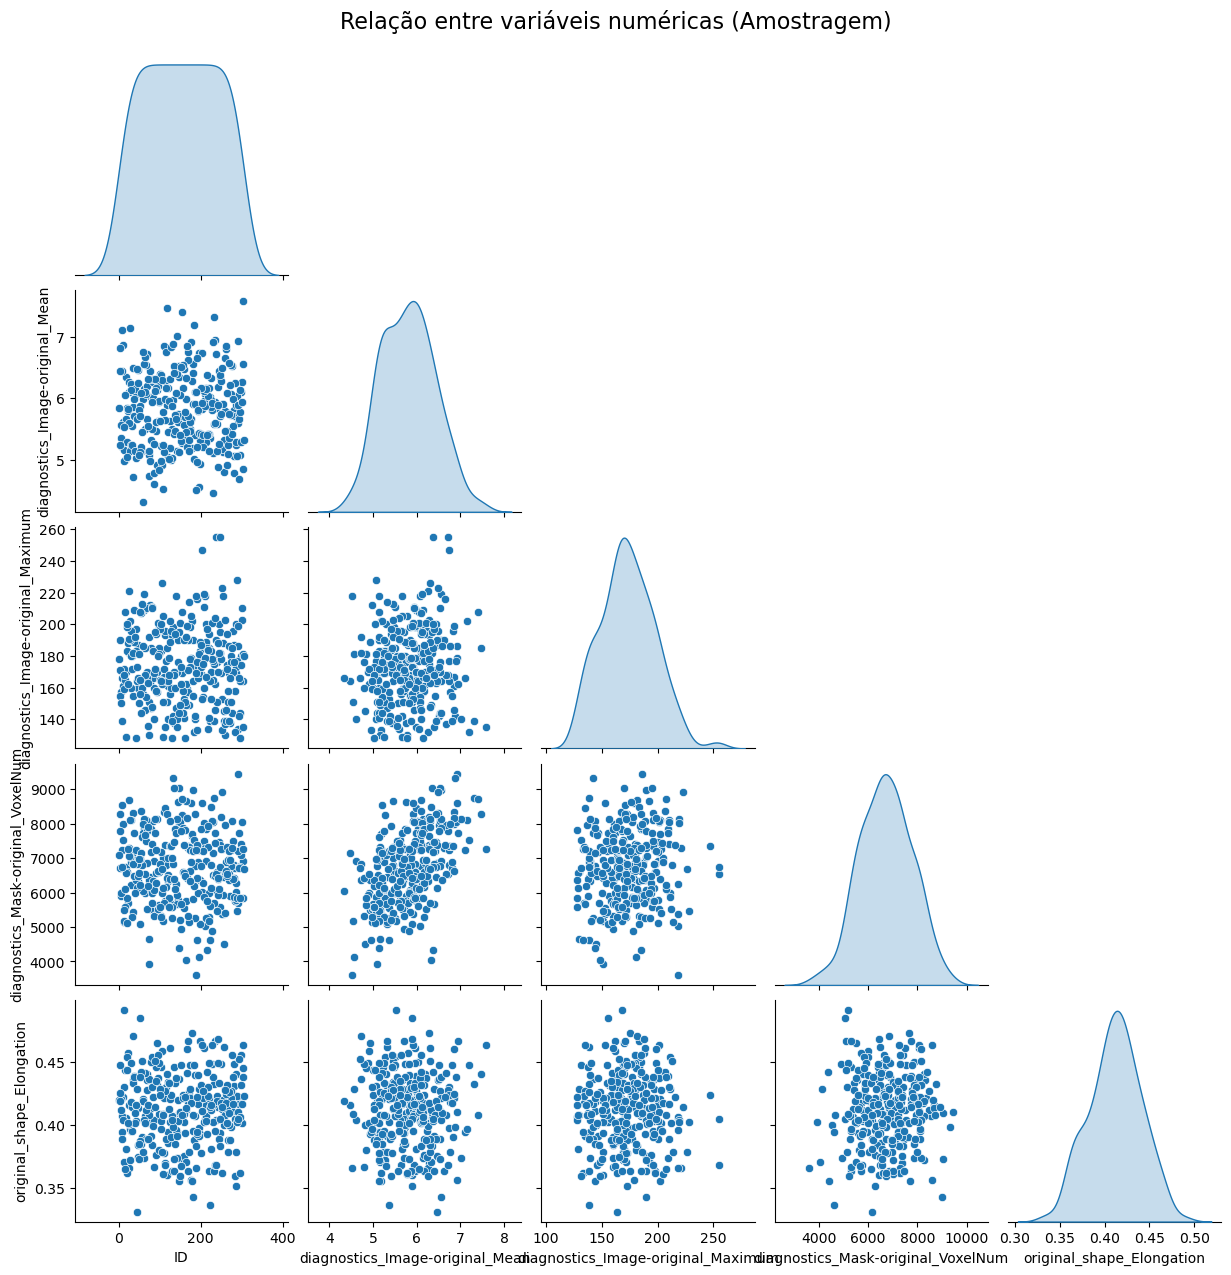

In [12]:
# Determinar o tamanho da amostra baseado no tamanho do dataset
sample_size = min(500, len(DShippo))  # Usa 500 ou o tamanho total do dataset, o que for menor

# Seleção de um subconjunto de variáveis numéricas
numeric_columns = DShippo.select_dtypes(include=["float", "int"]).columns
selected_columns = numeric_columns[:5]  # Limita para as 5 primeiras variáveis numéricas (ajuste conforme necessário)

# Verifica se há mais de uma variável para o pairplot
if len(selected_columns) > 1:
    sampled_data = DShippo[selected_columns].sample(n=sample_size, random_state=42)  # Amostra ajustada
    sns.pairplot(sampled_data, diag_kind="kde", corner=True, height=2.5)
    plt.suptitle("Relação entre variáveis numéricas (Amostragem)", y=1.02, fontsize=16)
    plt.show()
else:
    print("Número insuficiente de variáveis numéricas para gerar um pairplot.")


In [16]:
# Lista de variâncias de todas as colunas, uma por linha
for coluna, variancia in DShippo.var(numeric_only=True).items():
    print(f"{coluna}: {variancia}")

ID: 7777.5
diagnostics_Image-original_Mean: 0.37682157441820135
diagnostics_Image-original_Maximum: 581.2376402070753
diagnostics_Mask-original_VoxelNum: 1138095.6729292495
original_shape_Elongation: 0.0008405805846117601
original_shape_Flatness: 9.485192102111487e-05
original_shape_LeastAxisLength: 0.8305212199206325
original_shape_MajorAxisLength: 38.196535842753406
original_shape_Maximum2DDiameterColumn: 16.625808191535093
original_shape_Maximum2DDiameterRow: 16.376303022643704
original_shape_Maximum2DDiameterSlice: 5.992037111667308
original_shape_Maximum3DDiameter: 15.918407660496895
original_shape_MeshVolume: 1125761.3444030255
original_shape_MinorAxisLength: 6.420223840875647
original_shape_Sphericity: 0.00036812934287747714
original_shape_SurfaceArea: 162205.77772942215
original_shape_SurfaceVolumeRatio: 0.004175441347809585
original_shape_VoxelVolume: 1138095.6729292495
original_firstorder_10Percentile: 23.05387338222605
original_firstorder_90Percentile: 4.158077653149269
orig

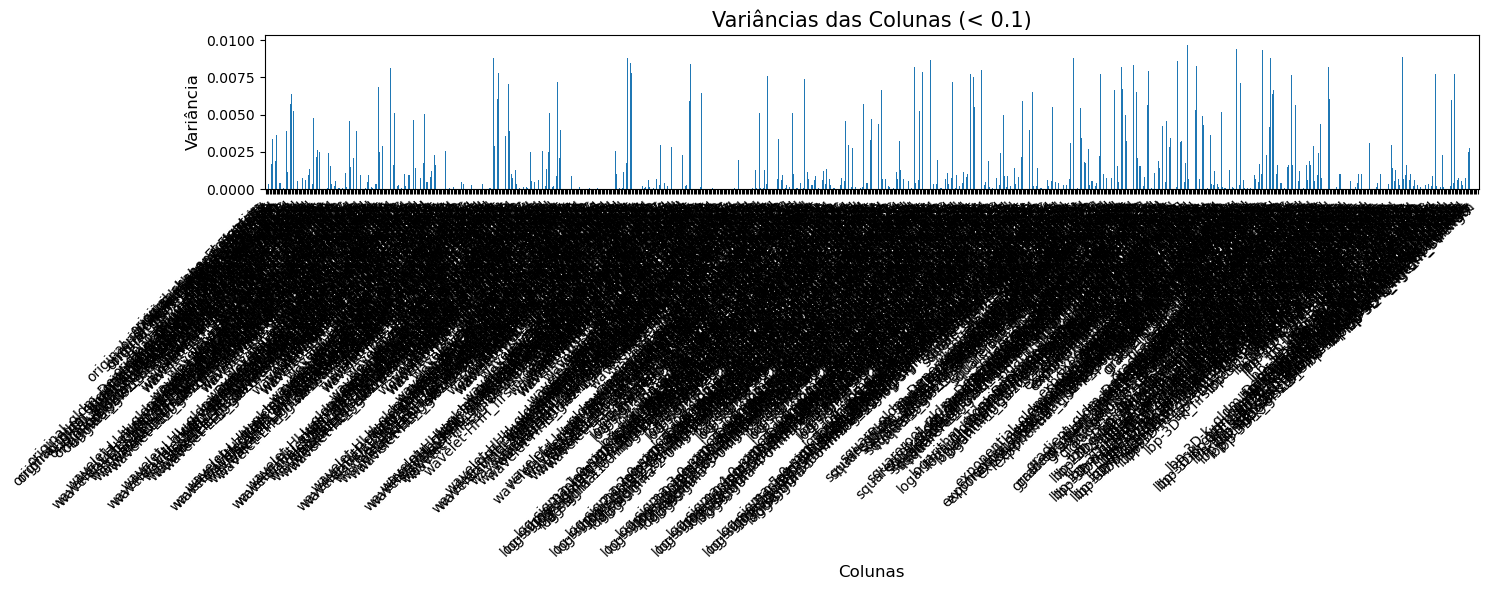

In [27]:
#  Calcula as variâncias
variancias = DShippo.var(numeric_only=True)

# Filtra variâncias entre -0.2 e 0.2
variancias_filtradas = variancias[(variancias <= 0.01)]

# Configura o tamanho do gráfico
plt.figure(figsize=(15, 6))

# Cria o gráfico de barras com variâncias filtradas
variancias_filtradas.plot(kind='bar')

# Personaliza o gráfico
plt.title('Variâncias das Colunas (< 0.1)', fontsize=15)
plt.xlabel('Colunas', fontsize=12)
plt.ylabel('Variância', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Mostra o gráfico
plt.show()

In [28]:
print(variancias_filtradas)

original_shape_Elongation            8.405806e-04
original_shape_Flatness              9.485192e-05
original_shape_Sphericity            3.681293e-04
original_shape_SurfaceVolumeRatio    4.175441e-03
original_firstorder_Uniformity       1.690513e-03
                                         ...     
lbp-3D-k_glszm_ZonePercentage        4.035012e-06
lbp-3D-k_ngtdm_Coarseness            2.820589e-07
lbp-3D-k_ngtdm_Complexity            5.897649e-04
lbp-3D-k_ngtdm_Contrast              1.454859e-05
lbp-3D-k_ngtdm_Strength              3.041554e-07
Length: 885, dtype: float64
